# Stephanie's Working Notebook

## Work starting Tuesday, 2/22
Goals for today:
- read Kan's csv file to df to explore with
- add sentiment scores using his algorithm and mine to explore (see questions for explore [here](https://trello.com/c/d7IxpXIS/25-exploratory-questions)
- Come up with minimum x4 Qs and As and Explore Takeaways
- Start adding work we have done to this point to README project info and slideshow shell


<hr>

In [43]:
# python data manipulation and analysis library
import numpy as np

# python library supporting operations on multidimensional arrays and matrices 
import pandas as pd

# python plotting library for visualizations
import matplotlib.pyplot as plt

# data visualization library for python based on matplotlib providing higher level visual interface and options
import seaborn as sns

# formatting for notebook grids
plt.style.use('seaborn-whitegrid')


### Step 1 | Acquire the data

In [2]:
# reading in Kan's prepped csv to df for exploration
df = pd.read_csv('csv_files/sentiment.csv')

In [3]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

df.head()

,file,message,date,content,sender,subject,clean,tokenize,stop_words,stemm,lemmatize,sentiment
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,phillip.allen@enron.com,NaN,here is our forecast\n\n,here is our forecast,forecast,here is our forecast,here is our forecast,0.0000
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,phillip.allen@enron.com,Re:,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,travel to have a busi meet take the fun out of...,traveling to have a business meeting take the ...,0.9313
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,phillip.allen@enron.com,Re: test,test successful way to go,test successful way to go,test successful way go,test success way to go,test successful way to go,0.5859
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",phillip.allen@enron.com,NaN,randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...,randy send schedule salary level everyone sche...,randi can you send me a schedul of the salari ...,randy can you send me a schedule of the salary...,0.0000
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,Re: Hello,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' s shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,-0.3400


In [4]:
ts = pd.read_csv('csv_files/time_series.csv')

ts.head()

,Unnamed: 0,date,sentiment
0,0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",0.0000
1,1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",0.9313
2,2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",0.5859
3,3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",0.0000
4,4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",-0.3400


##### I want to make sure the rows line up for both dfs before joining them together..

In [5]:
# checking row counts
df.shape[0] == ts.shape[0]

False

In [6]:
df.shape[0]

371388

In [7]:
ts.shape[0]

517401

##### They are not `==`  I will go back and look at why later but, for now, just work with the data read in from the `sentiment.csv` file
### Step 2 | Prepare date for explore
1. drop unnecessary columns
2. handle nulls
3. add on my algorithms sentiment scores

In [8]:
# preview df
df.head(1)

,file,message,date,content,sender,subject,clean,tokenize,stop_words,stemm,lemmatize,sentiment
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,phillip.allen@enron.com,NaN,here is our forecast\n\n,here is our forecast,forecast,here is our forecast,here is our forecast,0.0


#### 2.1 Drop unnecessary columns

Columns to keep
- `date`
- `sender`
- `subject`
- `lemmatize` >> `msg_content`
- `file` >> `file_directory`
- `sentiment`

In [9]:
df = df[['date', 'sender', 'subject', 'lemmatize', 'file', 'sentiment']]

df.head(1)

,date,sender,subject,lemmatize,file,sentiment
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,NaN,here is our forecast,allen-p/_sent_mail/1.,0.0


#### 2.2 Handle nulls

In [10]:
# looking at null counts as a percentage of total data count
(df.isna().sum()/df.shape[0])*100

date         0.000000
sender       0.000000
subject      3.780413
lemmatize    0.008616
file         0.000000
sentiment    0.000269
dtype: float64

**Columns with nulls**
- `subject` >> these are emails without a subject, don't want to drop these, instead will flag by filling `nan` value with str value `no_subject`
- `lemmatize` >> these are emails with no `Nan` or empty email values, small fraction but want to see if anything interesting here >> I want to look at this but will likely flag with str value `empty_text`
- `sentiment` >> no sentiment score, for now such a small % of total will drop these

##### Looking at the rows with `Null` values for the email text

In [11]:
no_text = df[df.lemmatize.isna() == True]

no_text

,date,sender,subject,lemmatize,file,sentiment
40425,"Mon, 11 Dec 2000 03:24:00 -0800 (PST)",don.baughman@enron.com,Bush Country,NaN,campbell-l/all_documents/1208.,0.0
42034,"Mon, 11 Dec 2000 03:24:00 -0800 (PST)",don.baughman@enron.com,Bush Country,NaN,campbell-l/discussion_threads/1084.,0.0
45726,"Mon, 11 Dec 2000 03:24:00 -0800 (PST)",don.baughman@enron.com,Bush Country,NaN,campbell-l/notes_inbox/92.,0.0
52244,"Fri, 26 Oct 2001 11:48:19 -0700 (PDT)",cjewell@bcm.tmc.edu,How to be beautiful all the time,NaN,corman-s/deleted_items/40.,0.0
56591,"Fri, 13 Apr 2001 07:26:00 -0700 (PDT)",marcia.linton@enron.com,TEXT OF BROCHURE ON HI GASPRICES/CALIF. CHAOS,NaN,dasovich-j/all_documents/11093.,0.0
75650,"Fri, 13 Apr 2001 07:26:00 -0700 (PDT)",marcia.linton@enron.com,TEXT OF BROCHURE ON HI GASPRICES/CALIF. CHAOS,NaN,dasovich-j/notes_inbox/4289.,0.0
84398,"Sat, 24 Nov 2001 12:27:57 -0800 (PST)",greg8835@hcqr.yahoo.com,How To Make Money On The Internet! -vgof,NaN,davis-d/deleted_items/173.,0.0
88943,"Tue, 20 Feb 2001 11:54:00 -0800 (PST)",david.delainey@enron.com,Re: Birthday Cards / Welcome Letters for EES E...,NaN,delainey-d/_sent_mail/692.,0.0
89856,"Tue, 20 Feb 2001 11:54:00 -0800 (PST)",david.delainey@enron.com,Re: Birthday Cards / Welcome Letters for EES E...,NaN,delainey-d/all_documents/728.,0.0
91634,"Tue, 20 Feb 2001 11:54:00 -0800 (PST)",david.delainey@enron.com,Re: Birthday Cards / Welcome Letters for EES E...,NaN,delainey-d/sent/697.,0.0


In [12]:
# looking at the sentiment score for these emails
no_text.sentiment.value_counts()

0.0    31
Name: sentiment, dtype: int64

In [13]:
# looking at the sender
no_text.sender.value_counts()

matthew.lenhart@enron.com     9
don.baughman@enron.com        3
david.delainey@enron.com      3
gayla.seiter@enron.com        3
marcia.linton@enron.com       2
dan.hyvl@enron.com            2
tracy.geaccone@enron.com      1
louise.kitchen@enron.com      1
frank.hayden@enron.com        1
gerald.nemec@enron.com        1
rumaldo.lopez@enron.com       1
shirley.crenshaw@enron.com    1
legal.7@enron.com             1
cjewell@bcm.tmc.edu           1
heather.mathis@enron.com      1
greg8835@hcqr.yahoo.com       1
Name: sender, dtype: int64

##### I am okay with dropping these for now. They all have 0 sentiment scores and, unless `matthew.lenhart@enron.com` is a person of interest I do not see where I would need these. 
I am thinking that a lot of the emails may just have attachments?

In [14]:
# filling null subject values with flag >> no_subject
df.subject.fillna('no_subject', inplace = True)

In [15]:
# making sure went through
df[df.subject == 'no_subject']

,date,sender,subject,lemmatize,file,sentiment
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,no_subject,here is our forecast,allen-p/_sent_mail/1.,0.0000
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,no_subject,randy can you send me a schedule of the salary...,allen-p/_sent_mail/1000.,0.0000
6,"Tue, 22 Aug 2000 07:44:00 -0700 (PDT)",phillip.allen@enron.com,no_subject,please cc the following distribution list with...,allen-p/_sent_mail/1003.,0.7579
11,"Fri, 13 Oct 2000 06:45:00 -0700 (PDT)",phillip.allen@enron.com,no_subject,lucy here are the rentrolls open them and save...,allen-p/_sent_mail/104.,0.8934
14,"Thu, 5 Oct 2000 06:26:00 -0700 (PDT)",phillip.allen@enron.com,no_subject,dave here are the name of the west desk member...,allen-p/_sent_mail/107.,0.0000
...,...,...,...,...,...,...
370991,"Thu, 24 Jan 2002 12:45:53 -0800 (PST)",emainzer@attbi.com,no_subject,hey richard what is your full mail address in ...,ring-r/deleted_items/282.,0.3400
371068,"Fri, 19 Oct 2001 08:25:22 -0700 (PDT)",richard.ring@enron.com,no_subject,kathy i will be on vacation this afternoon tha...,ring-r/deleted_items/88.,0.4404
371226,"Tue, 16 Oct 2001 12:15:18 -0700 (PDT)",michael.frazier@enron.com,no_subject,here is the bge file i mentioned sorry to be s...,ring-r/eesiisopjm/7.,0.5106
371284,"Wed, 29 Aug 2001 11:36:00 -0700 (PDT)",elliot.mainzer@enron.com,no_subject,how many state are we actively offering direct...,ring-r/eesirenewableenergy/143.,0.5859


#### Looking at the null emails

In [16]:
df[df.lemmatize.isna() == True]

,date,sender,subject,lemmatize,file,sentiment
40425,"Mon, 11 Dec 2000 03:24:00 -0800 (PST)",don.baughman@enron.com,Bush Country,NaN,campbell-l/all_documents/1208.,0.0
42034,"Mon, 11 Dec 2000 03:24:00 -0800 (PST)",don.baughman@enron.com,Bush Country,NaN,campbell-l/discussion_threads/1084.,0.0
45726,"Mon, 11 Dec 2000 03:24:00 -0800 (PST)",don.baughman@enron.com,Bush Country,NaN,campbell-l/notes_inbox/92.,0.0
52244,"Fri, 26 Oct 2001 11:48:19 -0700 (PDT)",cjewell@bcm.tmc.edu,How to be beautiful all the time,NaN,corman-s/deleted_items/40.,0.0
56591,"Fri, 13 Apr 2001 07:26:00 -0700 (PDT)",marcia.linton@enron.com,TEXT OF BROCHURE ON HI GASPRICES/CALIF. CHAOS,NaN,dasovich-j/all_documents/11093.,0.0
75650,"Fri, 13 Apr 2001 07:26:00 -0700 (PDT)",marcia.linton@enron.com,TEXT OF BROCHURE ON HI GASPRICES/CALIF. CHAOS,NaN,dasovich-j/notes_inbox/4289.,0.0
84398,"Sat, 24 Nov 2001 12:27:57 -0800 (PST)",greg8835@hcqr.yahoo.com,How To Make Money On The Internet! -vgof,NaN,davis-d/deleted_items/173.,0.0
88943,"Tue, 20 Feb 2001 11:54:00 -0800 (PST)",david.delainey@enron.com,Re: Birthday Cards / Welcome Letters for EES E...,NaN,delainey-d/_sent_mail/692.,0.0
89856,"Tue, 20 Feb 2001 11:54:00 -0800 (PST)",david.delainey@enron.com,Re: Birthday Cards / Welcome Letters for EES E...,NaN,delainey-d/all_documents/728.,0.0
91634,"Tue, 20 Feb 2001 11:54:00 -0800 (PST)",david.delainey@enron.com,Re: Birthday Cards / Welcome Letters for EES E...,NaN,delainey-d/sent/697.,0.0


### Splitting data for exploration
Enrom Timeline: https://www.theguardian.com/business/2006/jan/30/corporatefraud.enron
- 1998: Enron buys Britain's Weessex Water
- Nov 1999: Enron Online (first global commidty trading platform) launches
- Aug 2000: Enron shares hit all time high
- 5 Feb 2001: Arthur Andersen considers not serving Enron due to special partnerships to disguise debt
<hr> 

- **14 Aug 2001: Jeff Skilling (CEO from 12 Feb 2001) resigns for personal reasons**
- 15 Aug 2001: Sheron Watkins (VP) warns Kenneth Lay (CEO) of question accounting practices
- 24 Oct 2001: Andrew Fastow (CFO) is fired
- 8 Nov 2001: Enron announced it overstated profits by 60M going back to 1997
- 2 Dec 2001: Enron files for bankruptsy
- 3 Dec 2001: Eron lays off 4K employees
- 9 Jan 2002: Justice Department investigates Enron
- 24 Jan 2002: Kenneth Lay (CEO) resigns
- 14 Mar 2002: Arthur Andersen indicted
- 31 Oct 2002: Fastow indicted



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371388 entries, 0 to 371387
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       371388 non-null  object 
 1   sender     371388 non-null  object 
 2   subject    371388 non-null  object 
 3   lemmatize  371356 non-null  object 
 4   file       371388 non-null  object 
 5   sentiment  371387 non-null  float64
dtypes: float64(1), object(5)
memory usage: 17.0+ MB


##### I need to change the `date` colum to datetime format and then split by date

In [18]:
# changing date column dtype
df.date = pd.to_datetime(df.date, utc = True)

df.head()

,date,sender,subject,lemmatize,file,sentiment
0,2001-05-14 23:39:00+00:00,phillip.allen@enron.com,no_subject,here is our forecast,allen-p/_sent_mail/1.,0.0000
1,2001-05-04 20:51:00+00:00,phillip.allen@enron.com,Re:,traveling to have a business meeting take the ...,allen-p/_sent_mail/10.,0.9313
2,2000-10-18 10:00:00+00:00,phillip.allen@enron.com,Re: test,test successful way to go,allen-p/_sent_mail/100.,0.5859
3,2000-10-23 13:13:00+00:00,phillip.allen@enron.com,no_subject,randy can you send me a schedule of the salary...,allen-p/_sent_mail/1000.,0.0000
4,2000-08-31 12:07:00+00:00,phillip.allen@enron.com,Re: Hello,let ' s shoot for tuesday at 1145,allen-p/_sent_mail/1001.,-0.3400


In [19]:
# getting the size of data by splitting by 08/13 before and after
df[df.date <= '2001-08-13'].shape[0], df[df.date > '2001-08-13'].shape[0]

(282429, 88959)

In [20]:
# splitting the data
train = df[df.date <= '2001-08-13']
test = df[df.date > '2001-08-13']

# Q1. What is the distribution of sentiment scores?

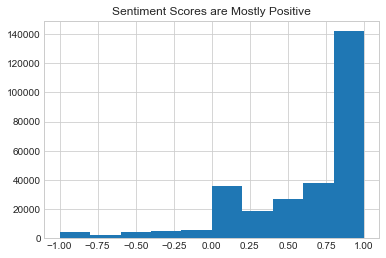

In [44]:
train.sentiment.hist()
plt.title('Sentiment Scores are Mostly Positive')
plt.show()

#### A1. The sentiment scores are mostly postive, strongly left skewed. 
There is a bump where they are neutral and the lower sentiment scores, less than 0, are anomalies that I want to investigate.

# Q2. Who has the highest and lowest sentiment scores?

In [35]:
# top sentiment scores
train.groupby('sender').agg('mean').sort_values(by = ['sentiment'], ascending = False).head(50)

,sentiment
sender,
trhtml-owner@maui.tr.com,1.000000
jordan.w.cowman@bakernet.com,0.999950
whitney@thelaw.net,0.999906
lexis-nexis@prod.lexis-nexis.com,0.999900
enerfax@lb.bcentral.com,0.999900
feedback@travelocity.com,0.999900
info@tbls.org,0.999900
owner-e-fficiencynews@crest.org,0.999900
co.o.l._111400@airmail.continental.com,0.999900


In [37]:
train.groupby('sender').agg('mean').sort_values(by = ['sentiment'], ascending = False).tail(50)

,sentiment
sender,
postmaster@notes.mckinsey.com,-0.735100
karie.hastings@enron.com,-0.740300
robert.anthony@brookwoods.com,-0.750700
anita.fam@enron.com,-0.754300
john.wilson@enron.com,-0.765000
houston.1@worldnet.att.net,-0.788920
nicole.la@enron.com,-0.790600
sudpa@wenet.net,-0.796400
karenfitzgerald@bigfoot.com,-0.807800


##### Takeaways
- When grouping emails by sender, the top 50 average sentiment scores are from non-Enron email address
- 

# Q3. Who is sending the most emails?

In [38]:
train.sender.value_counts().head(10)

kay.mann@enron.com               16312
vince.kaminski@enron.com         14345
jeff.dasovich@enron.com           9528
tana.jones@enron.com              7651
chris.germany@enron.com           7376
steven.kean@enron.com             6724
enron.announcements@enron.com     6400
pete.davis@enron.com              5338
eric.bass@enron.com               4870
matthew.lenhart@enron.com         4849
Name: sender, dtype: int64

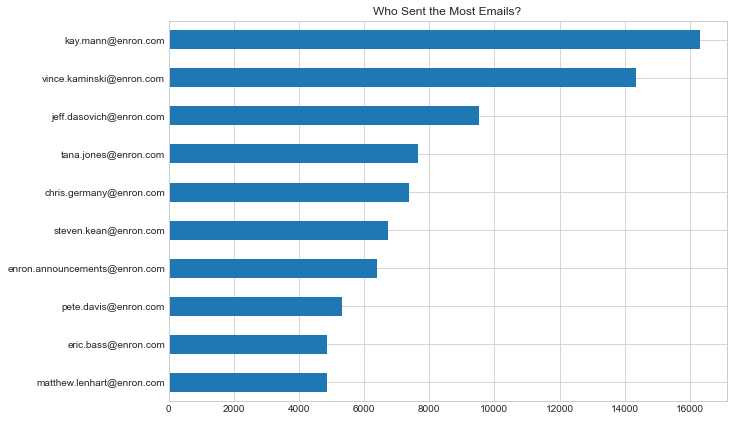

In [51]:
plt.figure(figsize = (10, 7))

train.sender.value_counts().head(10).sort_values().plot.barh()
plt.title('Who Sent the Most Emails?')
plt.show()

#### Most emails are coming from within Enron
- Kay Mann
- Vince Kaminski
- Jeff Dasovich

# Q5. What proportion of emails are internal/external to Enron?
- Do emails from outside of company have higher or lower average sentiment scores?

In [74]:
# emails from within in enron
internal = train[train.sender.str.contains('enron')]
internal.head()

,date,sender,subject,lemmatize,file,sentiment
0,2001-05-14 23:39:00+00:00,phillip.allen@enron.com,no_subject,here is our forecast,allen-p/_sent_mail/1.,0.0000
1,2001-05-04 20:51:00+00:00,phillip.allen@enron.com,Re:,traveling to have a business meeting take the ...,allen-p/_sent_mail/10.,0.9313
2,2000-10-18 10:00:00+00:00,phillip.allen@enron.com,Re: test,test successful way to go,allen-p/_sent_mail/100.,0.5859
3,2000-10-23 13:13:00+00:00,phillip.allen@enron.com,no_subject,randy can you send me a schedule of the salary...,allen-p/_sent_mail/1000.,0.0000
4,2000-08-31 12:07:00+00:00,phillip.allen@enron.com,Re: Hello,let ' s shoot for tuesday at 1145,allen-p/_sent_mail/1001.,-0.3400


In [75]:
# external emails
external = train[~train.sender.str.contains('enron')]
external.head()

,date,sender,subject,lemmatize,file,sentiment
602,2000-12-14 02:41:00+00:00,1.11913372.-2@multexinvestornetwork.com,"December 14, 2000 - Bear Stearns' predictions ...",in today ' s daily update you ' ll find free r...,allen-p/all_documents/1.,0.9994
603,2000-12-13 16:35:00+00:00,messenger@ecm.bloomberg.com,Bloomberg Power Lines Report,here is today ' s copy of bloomberg power line...,allen-p/all_documents/10.,0.9951
614,2000-12-13 14:04:00+00:00,aod@newsdata.com,Special report coming from NewsData,our sacramento correspondent just exited a new...,allen-p/all_documents/11.,-0.3818
656,2000-12-13 16:50:00+00:00,market-reply@listserv.dowjones.com,MARKET ALERT: Nasdaq Composite Ends Down 3.7%,market alert from the wall street journal dece...,allen-p/all_documents/15.,0.9760
678,2000-12-13 16:47:00+00:00,webmaster@earnings.com,FS Van Kasper Initiates Coverage of NT,if you cannot read this email please click her...,allen-p/all_documents/17.,0.9858


In [79]:
print(f'Internal emails: {internal.shape[0]}\nExternal emails: {external.shape[0]}')
print(f'Difference: {internal.shape[0] - external.shape[0]}')
print()
print(f'Ratio: {int(internal.shape[0]/train.shape[0]*100)}% of emails are from within Enron.')

Internal emails: 243825
External emails: 38604
Difference: 205221

Ratio: 86% of emails are from within Enron.


#### Creating another feature to explore `internal`
- will add to `test` data if used in mdoeling

In [83]:
# adding to test
train['is_internal'] = train.sender.str.contains('enron')

train.head()

<ipython-input-83-df15760a10e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['is_internal'] = train.sender.str.contains('enron')


,date,sender,subject,lemmatize,file,sentiment,is_internal
0,2001-05-14 23:39:00+00:00,phillip.allen@enron.com,no_subject,here is our forecast,allen-p/_sent_mail/1.,0.0000,True
1,2001-05-04 20:51:00+00:00,phillip.allen@enron.com,Re:,traveling to have a business meeting take the ...,allen-p/_sent_mail/10.,0.9313,True
2,2000-10-18 10:00:00+00:00,phillip.allen@enron.com,Re: test,test successful way to go,allen-p/_sent_mail/100.,0.5859,True
3,2000-10-23 13:13:00+00:00,phillip.allen@enron.com,no_subject,randy can you send me a schedule of the salary...,allen-p/_sent_mail/1000.,0.0000,True
4,2000-08-31 12:07:00+00:00,phillip.allen@enron.com,Re: Hello,let ' s shoot for tuesday at 1145,allen-p/_sent_mail/1001.,-0.3400,True


<Figure size 360x864 with 0 Axes>

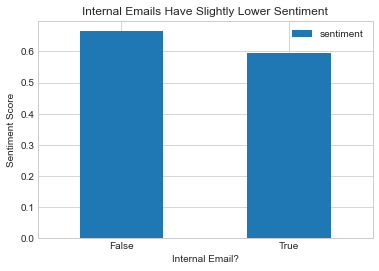

In [110]:
plt.figure(figsize = (5, 12))

train.groupby('is_internal').mean().plot.bar()
plt.ylabel('Sentiment Score')
plt.xlabel('Internal Email?')
plt.xticks(rotation = 360)
plt.title('Internal Emails Have Slightly Lower Sentiment')
plt.show();

In [22]:
stop_running_notebook_code >> here

NameError: name 'stop_running_notebook_code' is not defined

## Work done week0

## Acquire
Emails library documentation: [link](https://docs.python.org/3/library/email.html)<br>
Data source: [link](https://www.kaggle.com/wcukierski/enron-email-dataset)

In [ ]:
# standard python imports
import numpy as np
import pandas as pd

# imports from python emails library
from email.parser import Parser

In [ ]:
# reading csv to df
df = pd.read_csv('../emails.csv')

df.head()

In [ ]:
# getting size of df
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns of data.')

In [ ]:
# looking at the first message to begin the process of parsing out the message text
df.message[0]

### The message has some key compents that we can parse out using the `emails` Python Library
- `datetime`
- `sender`
- `recipient`
- `subject`
- `message content` 

In [ ]:
# looking to see if pattern matches in other messages
print(df.message[1])
print()
print(df.message[23])
print()
print(df.message[54])

### Something else to possibly look at for later would be cc and bcc recipients as well as forwarding
If there were any/quantity/who they were/how. many times a message was forwarded

In [ ]:
# saving x1 test message to variable to write code for function that will loop through all messages
message = df.message[63]

# function step 1 | getting full message data
message = Parser().parsestr(message)

# looking at output Parsed message object
message

In [ ]:
# looking at printout of Parsed message object
print(message)

In [ ]:
# looking at the message dtype
type(message)

### We can use the [email.message.Message](https://docs.python.org/3/library/email.compat32-message.html) documents to further parse the message info

In [ ]:
# parsed message text content
text = message.get_payload()
text

In [ ]:
# looking at text printout
print(text)

In [ ]:
# parsing sender
sender = message['From']
sender

In [ ]:
# parsing recipient
recip = message['To']
recip

### `recip` will be something to possibly look at post MVP
- number of recipients
- frequency of certainr recipient groups

In [ ]:
# parsing message date
date = message['Date']
date

In [ ]:
# # running dataframe message contents through for loop that will above code to parse contents and save to lists

# # empty lists to be appended in for loop and added to df later
# content = []
# date = []
# sender = []

# # for loop 
# for string in df.message:
#     message = Parser().parsestr(string)
#     msg_content = message.get_payload()
#     msg_date = message['Date']
#     msg_sender = message['From']
#     # adding to empty lists
#     content.append(msg_content)
#     date.append(msg_date)
#     sender.append(msg_sender)

### Skipping ahead and using code from `acquire.pj.py` file in PJ's folder

In [ ]:
def acquire_emails():
    df = pd.read_csv('../emails.csv')

    bodies = []
    dates = []

    # loop through email messages
    for i in df.message:
        # parse and set message to email data type
        headers = Parser().parsestr(i)
        # get the body text of the email
        body = headers.get_payload()
        # get the date from email
        date = headers['Date']
        # append date and body text to lists
        bodies.append(body)
        dates.append(date)

    # Set lists to dataframes
    body_df = pd.DataFrame(bodies, columns = ['Content'])
    dates_df = pd.DataFrame(dates, columns = ['Content'])

    # Insert those data frames into our orignal dataframe
    df.insert(1, "content", body_df)
    df.insert(1, "date", dates_df)

    return df

In [ ]:
raw_data = pd.read_csv('raw_data.csv')

raw_data.head()

### For prepare using `stem` for MVP because it is faster. 
Also saving removing stop words for post MVP work
- lowercase
- dtypes
- nulls

In [ ]:
import prepare_steph as prepare

In [ ]:
def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = unicodedata.normalize('NFKD', string)\
            .encode('ascii', 'ignore')\
            .decode('utf-8', 'ignore')
    string = re.sub(r'[^\w\s]', '', string).lower()
    return string

In [ ]:
raw_data.content[54]

In [ ]:
import unicodedata
import re
import json
import os

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd
import acquire_pj
from time import strftime

from sklearn.model_selection import train_test_split

basic_clean(raw_data.content[54])

In [ ]:
print(basic_clean(raw_data.content[54]))

In [ ]:
raw_data.head(10)['content'].apply(basic_clean)

In [ ]:
# # caching raw data
# raw_data.to_csv('raw_data.csv')

In [ ]:
import pandas as pd 

df_2 = pd.read_csv('clean_data.csv')

In [ ]:
df_2.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace = True)

In [ ]:
df_2.head()

### Sentiment Analysis Code

In [ ]:
# imports
import math
import re
import string
from itertools import product

import nltk.data
from nltk.util import pairwise

In [ ]:
df_2.clean.dropna(inplace = True)

## terminal command to install textblob library >> `pip install textblob`
Textblob sentiment analyzer returns two properties for a given input sentence: 
- `Polarity` is a float that lies between [-1,1], 
    - -1 indicates negative sentiment and +1 indicates positive sentiments. 
- `Subjectivity` is also a float which lies in the range of [0,1]. 
    - Subjective sentences generally refer to personal opinion, emotion, or judgment. 
    
[Info Source](https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair#:~:text=Textblob%20sentiment%20analyzer%20returns%20two,of%20%5B0%2C1%5D.)

In [ ]:
# installing textblob library for sentiment analysis scoring
from textblob import TextBlob

In [ ]:
# writing code for one content to test out scoring function
test_1 = df_2.clean[1]
test_2 = df_2.clean[4]
test_3 = df_2.clean[88]

In [ ]:
print(TextBlob(test_1).sentiment)
print('-----------------------')
print(test_1)

In [ ]:
sent, sub = TextBlob(test_3).sentiment

In [ ]:
sent

In [ ]:
def sentiment_scores(string):
    '''
    
    '''
    
    polarity, subjectivity = TextBlob(string).sentiment
    
    return polarity, subjectivity

In [ ]:
def add_scores(df, clean_msg_col):
    '''
    
    '''
    
    df['polarity, subjectivity'] = df[clean_msg_col].apply(sentiment_scores)
    
    pol = []
    subj = []
    for tuple_ in df['polarity, subjectivity']:
        pol.append(list(tuple_)[0])
        subj.append(list(tuple_)[1])
    
#     df = df.drop(columns = ['polarity, sentiment'])
    df['polarity'] = pol
    df['subjectivity'] = sent
    
    return df

In [ ]:
test_df = add_scores(df_2.head(50), 'clean')
test_df[['clean', 'polarity, subjectivity']]

In [ ]:
test_df.clean[1]

In [ ]:
test_df[test_df.polarity == test_df.polarity.max()]

In [ ]:
test_df.content[21]

In [ ]:
test_df[test_df.polarity == test_df.polarity.min()]

In [ ]:
test_df.content[27]